# CatBoost and CoreML tutorial — Iris dataset

CatBoost does support model export to Apple's [CoreML](https://developer.apple.com/machine-learning/) format, which lets you to easily embed ML models into applications on Apple's platforms.

Due to limitations of CoreML spec, export of models with categorical features is not currently supported.

This tutorial demonstrates exporting of CatBoost model trained on  [Iris](https://en.wikipedia.org/wiki/Iris_flower_data_set) dataset to CoreML model.

Get iris dataset:

In [1]:
from sklearn import datasets
iris = datasets.load_iris()

Train the model:

In [2]:
import catboost
cls = catboost.CatBoostClassifier(loss_function='MultiClass')
cls.fit(iris.data, iris.target)

Predict probabilities:

In [3]:
cls.predict(iris.data[0:1], prediction_type="Probability")

array([[ 0.99700558,  0.00146422,  0.00153019]])

Save CoreML model:

In [4]:
cls.save_model(
    "iris.mlmodel",
    format="coreml", 
    export_parameters={
        'prediction_type': 'probability'
    }
)

Now you can import saved model to XCode and use it directly from swift:

```swift
import CoreML

let model = iris()
let sepal_l = 7.0
let sepal_w = 3.2
let petal_l = 4.7
let petal_w = 1.4

guard let output = try? model.prediction(input: irisInput(feature_0: sepal_l, feature_1: sepal_w, feature_2: petal_l, feature_3: petal_w)) else {
    fatalError("Unexpected runtime error.")
}

print(String(
    format: "Output probabilities: %1.5f; %1.5f; %1.5f",
    output.prediction[0].doubleValue,
    output.prediction[1].doubleValue,
    output.prediction[2].doubleValue
))
```

If you want to practice, iris model is easy to integrate into Apple's  [MarsHabitatPricer](https://developer.apple.com/documentation/coreml/integrating_a_core_ml_model_into_your_app) example project:

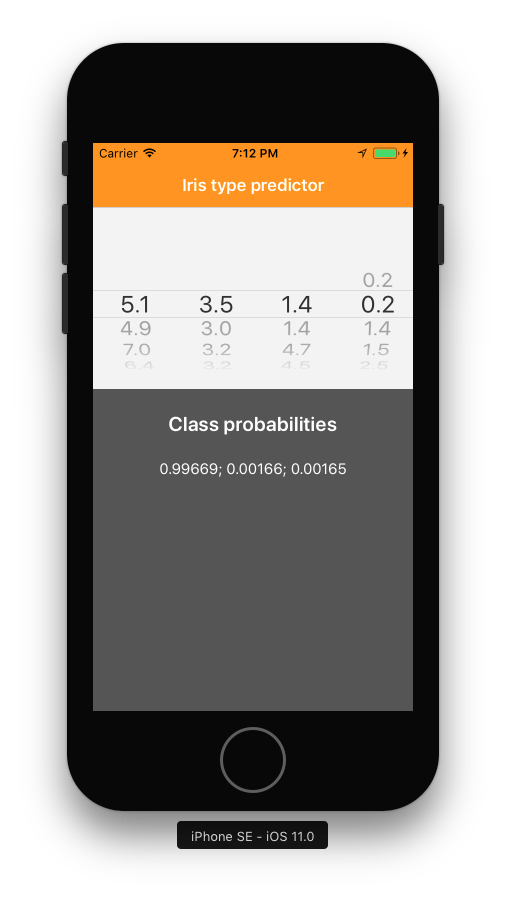